<a href="https://colab.research.google.com/github/M-H-Amini/DeepLearningmini/blob/master/DLm_Lec2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In The Name Of ALLAH
# Deep Learning *mini* Course
## PythonChallenge.ir
### Mohammad Hossein Amini (mhamini@aut.ac.ir)
# Lecture 2 - Multi-Layer Neural Networks

<img src="https://drive.google.com/uc?id=1ZJC1oII4kLDO1FM8SkaWr8_r63xrmrsn" width="400">



# Function Approximation
As the **Universal Approximation Theorem** was discussed in the lectures, we're going to approximate a sinusoidal function from some samples! Let's see.

In [1]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating Dataset


In [39]:
X = np.linspace(-3, 3, 20)[:, np.newaxis]
y = np.sin(X)
print(X.shape, y.shape)

(20, 1) (20, 1)


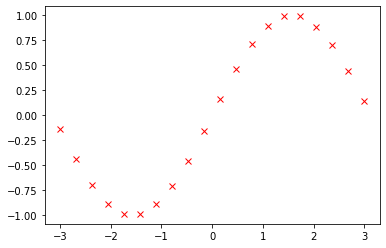

In [40]:
plt.figure()
plt.plot(X, y, 'rx')
plt.show()

# Creating Model
Time to create the neural net! Thanks to **keras**, it's super easy.

In [42]:
model = keras.Sequential()
model.add(keras.layers.Dense(6, activation='relu', input_shape=(1,)))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 6)                 12        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss='mse', optimizer='adam')

In [49]:
model.fit(X, y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1089
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1088
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1087
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1086
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1085
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1084
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1083
Epoch 8/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1082
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1081
Epoch 10/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1080
Epoch 11/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1079
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1078
Epoch 13/1000
1/1 [==============================

# Testing The Model

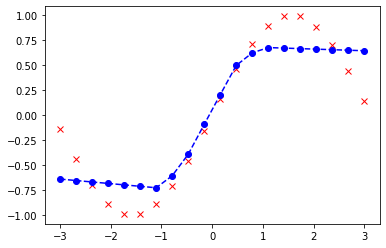

In [50]:
outputs = model.predict(X)
plt.figure()
plt.plot(X, y, 'rx', X, outputs, 'b--o')
plt.show()

# California Housing Dataset
Let's see a real dataset now. Real datasets usually have their own challenges.

In [25]:
ds = pd.read_csv('sample_data/california_housing_train.csv')
ds.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [28]:
ds.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [30]:
mean = ds.mean()
std = ds.std()
normalized_ds = (ds - mean) / std
#print(normalized_ds.std())

In [31]:
normalized_ds.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1.700000e+04,1.700000e+04,1.700000e+04,1.700000e+04,1.700000e+04,1.700000e+04,1.700000e+04,1.700000e+04,1.700000e+04
mean,-1.873515e-13,-1.640958e-13,-1.141166e-15,-1.632158e-16,-4.798580e-16,-1.876277e-16,-6.770401e-17,-1.123732e-14,-9.193692e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.387778e+00,-1.443488e+00,-2.191904e+00,-1.211802e+00,-1.277370e+00,-1.242819e+00,-1.300897e+00,-1.773271e+00,-1.658007e+00
25%,-1.111076e+00,-7.931470e-01,-8.412970e-01,-5.420611e-01,-5.751154e-01,-5.571915e-01,-5.701172e-01,-6.903014e-01,-7.578726e-01
50%,5.346729e-01,-6.434282e-01,3.262486e-02,-2.370078e-01,-2.500853e-01,-2.287522e-01,-2.398360e-01,-1.776469e-01,-2.319369e-01
75%,7.790417e-01,9.800853e-01,6.682044e-01,2.328431e-01,2.582190e-01,2.538880e-01,2.705395e-01,4.629714e-01,4.974756e-01
max,2.619288e+00,2.959181e+00,1.859916e+00,1.619000e+01,1.401091e+01,2.984043e+01,1.451359e+01,5.825791e+00,2.523630e+00


In [33]:
normalized_ds_arr = np.array(normalized_ds)
print(normalized_ds_arr.shape)
X = normalized_ds_arr[:, :8]
y = normalized_ds_arr[:, 8:]
print(X.shape, y.shape)

(17000, 9)
(17000, 8) (17000, 1)


In [35]:
model = keras.Sequential()
model.add(keras.layers.Dense(16, activation='sigmoid', input_shape=(8,)))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss = 'mse', optimizer='adam')

In [37]:
model.fit(X, y, epochs=50)

Epoch 1/50
532/532 [==============================] - 1s 2ms/step - loss: 0.6979
Epoch 2/50
532/532 [==============================] - 1s 2ms/step - loss: 0.3826
Epoch 3/50
532/532 [==============================] - 1s 2ms/step - loss: 0.3466
Epoch 4/50
532/532 [==============================] - 1s 2ms/step - loss: 0.3331
Epoch 5/50
532/532 [==============================] - 1s 2ms/step - loss: 0.3258
Epoch 6/50
532/532 [==============================] - 1s 2ms/step - loss: 0.3208
Epoch 7/50
532/532 [==============================] - 1s 2ms/step - loss: 0.3168
Epoch 8/50
532/532 [==============================] - 1s 2ms/step - loss: 0.3131
Epoch 9/50
532/532 [==============================] - 1s 2ms/step - loss: 0.3099
Epoch 10/50
532/532 [==============================] - 1s 2ms/step - loss: 0.3060
Epoch 11/50
532/532 [==============================] - 1s 2ms/step - loss: 0.3036
Epoch 12/50
532/532 [==============================] - 1s 2ms/step - loss: 0.3008
Epoch 13/50
532/532 [====

In [38]:
for i in range(20):
  print(f'No {i+1}: \t Target: {(y[i, 0]*std[-1])+mean[-1]}, \t Output: {model.predict(X[i:i+1, :])*std[-1] + mean[-1]}')

No 1: 	 Target: 66900.0, 	 Output: [[71150.66]]
No 2: 	 Target: 80100.00000000001, 	 Output: [[90425.58]]
No 3: 	 Target: 85700.00000000001, 	 Output: [[36572.72]]
No 4: 	 Target: 73400.0, 	 Output: [[61320.83]]
No 5: 	 Target: 65500.0, 	 Output: [[34303.58]]
No 6: 	 Target: 74000.0, 	 Output: [[11908.406]]
No 7: 	 Target: 82399.99999999999, 	 Output: [[31242.062]]
No 8: 	 Target: 48500.0, 	 Output: [[-26329.36]]
No 9: 	 Target: 58400.0, 	 Output: [[34365.08]]
No 10: 	 Target: 48100.0, 	 Output: [[-39805.83]]
No 11: 	 Target: 86500.0, 	 Output: [[38201.83]]
No 12: 	 Target: 62000.0, 	 Output: [[30706.047]]
No 13: 	 Target: 48600.0, 	 Output: [[-38790.53]]
No 14: 	 Target: 70400.0, 	 Output: [[-6964.4375]]
No 15: 	 Target: 45000.0, 	 Output: [[47025.484]]
No 16: 	 Target: 69100.0, 	 Output: [[36008.75]]
No 17: 	 Target: 94900.0, 	 Output: [[26409.953]]
No 18: 	 Target: 25000.0, 	 Output: [[56086.61]]
No 19: 	 Target: 44000.0, 	 Output: [[56366.906]]
No 20: 	 Target: 27500.0, 	 Output: [